In [1]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,plot_predict
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df_all = pd.read_csv('googletrends2.csv')
df = df_all['Python']
df.head()

0    15
1    16
2    19
3    19
4    20
Name: Python, dtype: int64

In [3]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [4]:
# Train with Holt's Linear Trend Model
holt_model = ExponentialSmoothing(train, trend="additive", seasonal=None)
model = holt_model.fit(optimized=True)

forecast = model.forecast(steps=len(test))

mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

MAE: 32.17096882193664, MSE: 1172.8690466188011, RMSE: 34.24717574660429


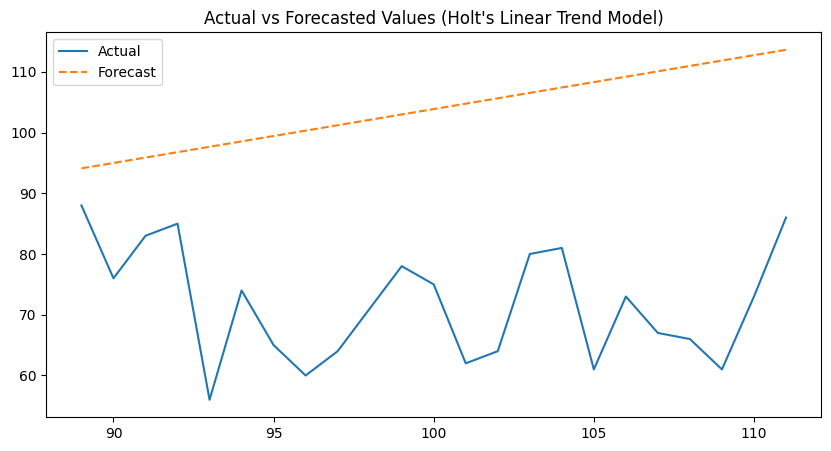

In [5]:

# Plotting actual vs. forecasted values
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title("Actual vs Forecasted Values (Holt's Linear Trend Model)")
plt.show()

In [6]:
non_zero_columns = df_all.loc[:, (df_all != 0).any(axis=0)]
gtrend_languages = [col for col in non_zero_columns.columns if col != 'Month']  
num2 = len(gtrend_languages)

d = {}
d['language']=[]
d['mae'] = []
d['mse'] = []
d['rmse'] = []

for language in gtrend_languages:
    df1=df_all[language]
    train_size = int(len(df1) * 0.8)
    train, test = df1[:train_size], df1[train_size:]

    holt_model = ExponentialSmoothing(train, trend="additive", seasonal=None)
    model = holt_model.fit(optimized=True)

    forecast = model.forecast(steps=len(test))

    mae = mean_absolute_error(test, forecast)
    mse = mean_squared_error(test, forecast)
    rmse = np.sqrt(mse)
    print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

    d['language'].append(language)
    d['mae'].append(mae)
    d['mse'].append(mse)
    d['rmse'].append(rmse)

df_res = pd.DataFrame.from_dict(d)
df_res.to_csv('result_holtwinters.csv',index=False)


MAE: 7.122005199839862, MSE: 53.713072305673556, RMSE: 7.328920268748567
MAE: 5.793079820902812, MSE: 38.04520025518621, RMSE: 6.168079138207146
MAE: 0.8249140838662986, MSE: 0.9188127286827239, RMSE: 0.9585471968988923
MAE: 1.117288481494681, MSE: 2.6355881036099245, RMSE: 1.6234494459668045
MAE: 2.6522155509901597, MSE: 9.60899073024579, RMSE: 3.0998372102814997
MAE: 10.45420323444731, MSE: 136.49660981203664, RMSE: 11.683176357995999
MAE: 1.2956153255806322, MSE: 2.454093821533026, RMSE: 1.5665547617408802
MAE: 16.828319612761625, MSE: 318.94691880945, RMSE: 17.859085049616905
MAE: 1.7774773207424488, MSE: 5.1442481691523945, RMSE: 2.2680935097901926
MAE: 32.17096882193664, MSE: 1172.8690466188011, RMSE: 34.24717574660429
MAE: 2.6443021173288814, MSE: 10.619117660057825, RMSE: 3.258698767922225
MAE: 1.0577800993560316, MSE: 1.8090678393734563, RMSE: 1.3450159253233607
MAE: 6.0376531600261805, MSE: 47.275826549964194, RMSE: 6.875741890877245
MAE: 0.009297658647465169, MSE: 8.64993642